In [122]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Change in mean ($\theta_{1} $ known)
Here, except for the change in time $ t_{0} $ all other parameters are assumed to be known.

In [123]:
n = 1
num_samples = 300
MU_0 = 0
MU_1 = 1
SIGMA = 1

In [124]:
def generate_time_series(MU_0, MU_1, SIGMA, N, NUM_SAMPLES):
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(1, NUM_SAMPLES * N)), 
                     np.random.normal(MU_1,SIGMA,(1, NUM_SAMPLES * N))),axis=1 )
    return TS[0]

def get_alarm_time(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h, kappa):
    v = MU_1 - MU_0
    b = (MU_1 - MU_0)/SIGMA
    
    decision_function = np.sum((TS.reshape(2*NUM_SAMPLES, N) - MU_0 - (v/2)), axis=1)
    
    decisions = decision_function > h
    
    t0 = np.argmax(decisions == True)
    
    threshold = MU_0 + (kappa * SIGMA/np.sqrt(N))
    y_bar = (1/N)*np.sum(TS.reshape(2*NUM_SAMPLES, N), axis=1)
    alarm_time = np.argmax(y_bar >= threshold)
    
    return decision_function, t0, alarm_time


def grid_search(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h_values, kappa_values):
    t0_vals = np.zeros((kappa_values.shape[0], h_values.shape[0]))
    alarm_vals = np.zeros((kappa_values.shape[0], h_values.shape[0]))
    for k in range(0, kappa_values.shape[0]):
        for h in range(0, h_values.shape[0]):            
            d, time, alarm_time = get_alarm_time(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h_values[h], kappa_values[k])
            t0_vals[k][h] = time
            alarm_vals[k][h] = alarm_time
            #print ("iteration for k = {0} and h = {1}: time={2}, alarm_time={3}, decision_funciton = {4}".
            #       format(kappa_values[k], h_values[h], time, alarm_time, d.shape))
            
    return t0_vals, alarm_vals

### Alarm is set when $ \frac{1}{N} \sum_{i=N(K-1)+1}^{NK} y_{i} \ge \mu_{0} + \kappa \frac{\sigma}{\sqrt{N}} $ 

In [125]:
TS = generate_time_series(0, 1, 1, n, num_samples)

<IPython.core.display.Javascript object>


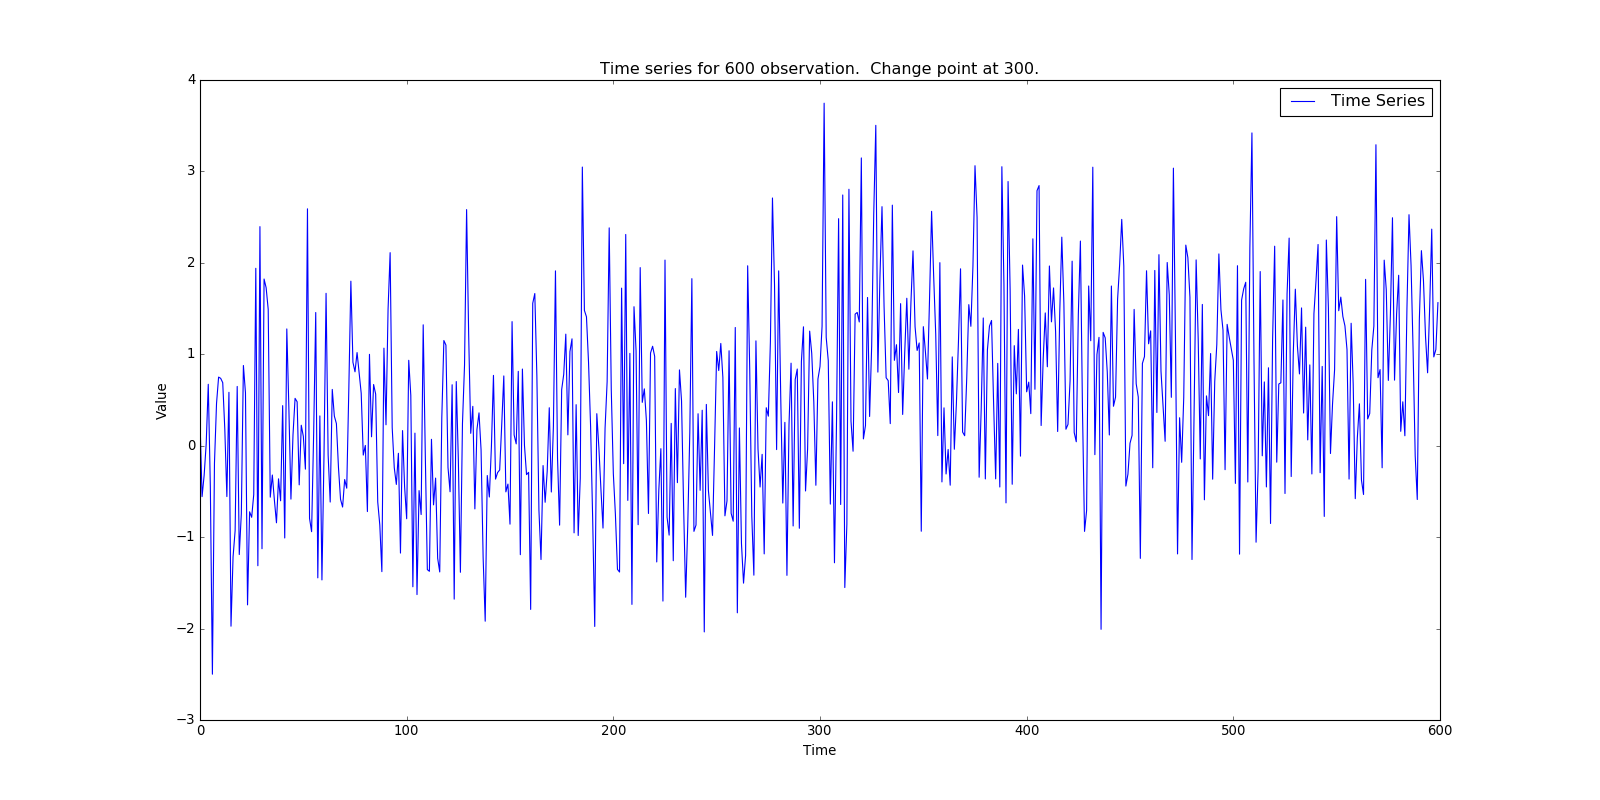

In [126]:
#print(TS.shape)
plt.figure(figsize=(20, 10))
plt.plot(TS, label="Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time series for 600 observation.  Change point at 300.")
plt.savefig('../images/1d_online_ts.png')
plt.legend()

In [127]:
plt.close()
h_values = np.arange(1.5, 5.5, 0.25)
kappa_values = np.arange(0.5, 4, 0.25)
t0_vals, alarm_vals = grid_search(MU_0, MU_1, SIGMA, TS, n, num_samples, h_values, kappa_values)

In [128]:
plt.close()
print(t0_vals.shape, alarm_vals.shape)
print(kappa_values.shape, h_values.shape)
X,Y = np.meshgrid(h_values, kappa_valuesa_values)

(14, 16) (14, 16)
(14,) (16,)


<IPython.core.display.Javascript object>


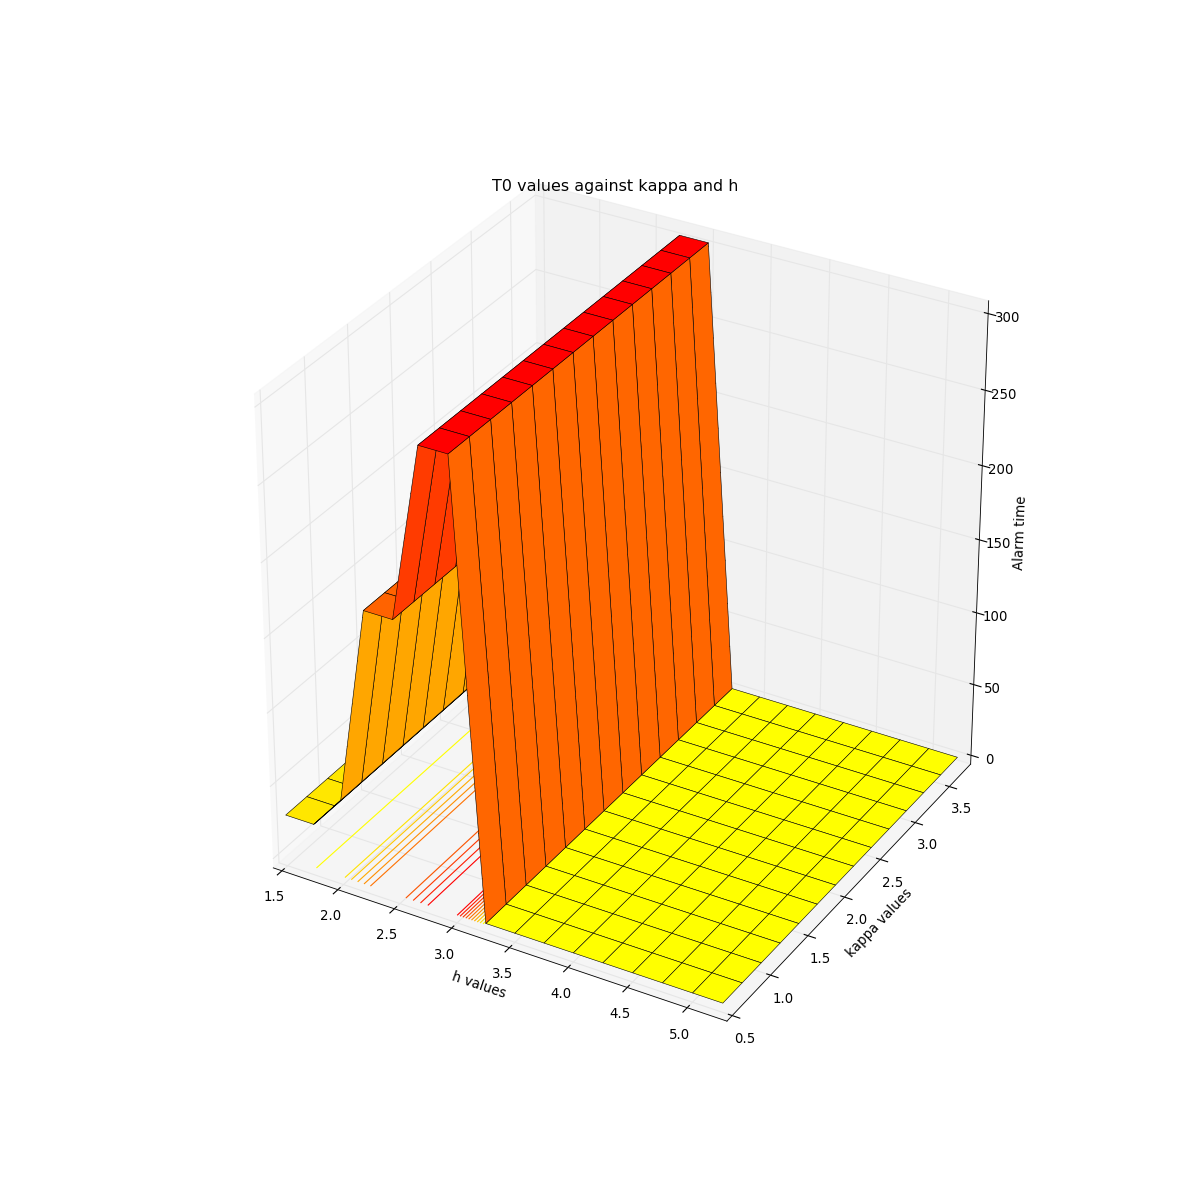

In [129]:
plt.close()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection="3d")
Z = t0_vals
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.xlabel("h values")
plt.ylabel("kappa values")
ax.set_zlabel("Alarm time")
plt.title("T0 values against kappa and h")
plt.savefig('../images/1d_online_time.png')

<IPython.core.display.Javascript object>


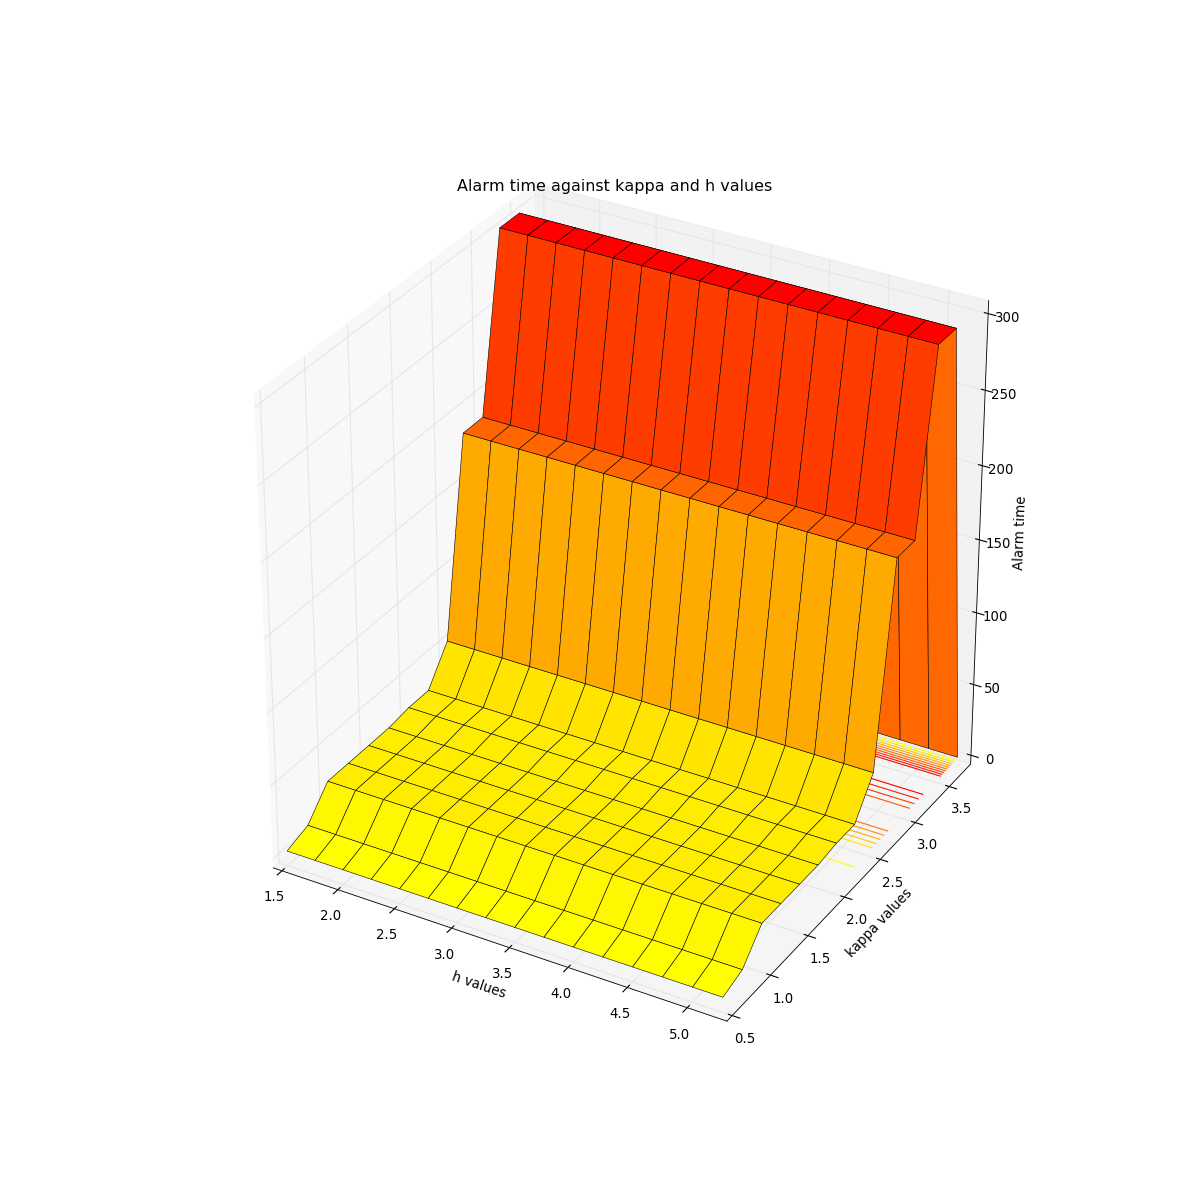

In [130]:
plt.close()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection="3d")
Z = alarm_vals
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.xlabel("h values")
plt.ylabel("kappa values")
ax.set_zlabel("Alarm time")
plt.title("Alarm time against kappa and h values")
plt.savefig('../images/1d_online_alarm.png')